In [1]:
%matplotlib inline
import cvxopt
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn import datasets

In [2]:
def linear(x,y):
        k = np.dot(x, y)
        return k

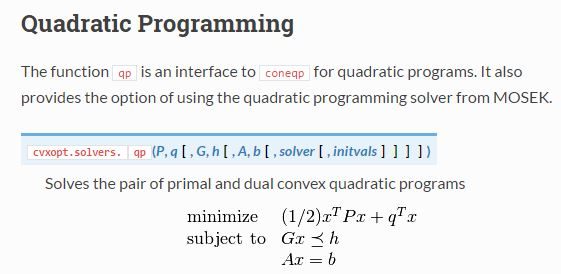

In [3]:
image=Image('q123.jpg')
image

In [4]:
#Trains an SVM
class train(object):
    def __init__(self, kernel=linear, c=None):
        self.kernel = kernel
        self.c = c
        if self.c != None:
            self.c = float(self.c)
    
    # Kernel Function
    def Kernel(self, X):
        X_a=np.asarray(X)
        n_data, n_features = X_a.shape
        K = np.zeros((n_data, n_data))
        for i in range(n_data):
            for j in range(n_data):
                K[i, j] = self.kernel(X[i], X[j])
        return K
        
    # find "-L_d(alpha)" 
    def compute(self, X, y):
        X_a=np.asarray(X)
        n_data, n_features = X_a.shape
        K = self.Kernel(X)
        
        # refer to the upper image for arguments
        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(-np.ones(n_data))
        G = cvxopt.matrix(np.diag(-np.ones(n_data)))
        h = cvxopt.matrix(np.zeros(n_data))
        A = cvxopt.matrix(y, (1,n_data), tc = 'd')
        b = cvxopt.matrix(0.)
            
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)
        L_d=np.ravel(sol['x'])
        
        svindices = L_d > 1e-4
        
        svmultipliers = L_d[svindices]
        n_weight=len(svmultipliers)
        X_a=np.asarray(X)
        sv = X_a[svindices]
        y_a=np.asarray(y)
        svlabels = y_a[svindices]

        ww = np.zeros((n_weight,4))
        weight = np.zeros(4)
        for i,a_i, x_i, y_i in zip(range(n_weight),svmultipliers,sv,svlabels):
            w_i=[a_i*y_i*x_ii
                for x_ii in x_i]
            w_a=np.array(w_i)
            ww[i]=w_a
        for ww_i in ww:
            weight+=np.array(ww_i)
        b=0
        for x_i,y_i in zip(sv,svlabels):
            b+= y_i-np.dot(weight,x_i)
        bias=b/n_data
        
        return weight,bias
    

In [5]:
iris= datasets.load_iris()

In [6]:
X=iris.data
Y=iris.target

In [7]:
X_0=X[0:50]
X_1=X[50:100]
X_2=X[100:150]
Y_0_train=-np.ones(40,dtype=int)
Y_1_train=np.ones(40,dtype=int)
Y_0_test=-np.ones(10,dtype=int)
Y_1_test=np.ones(10,dtype=int)

In [8]:
X_0_train=X_0[0:40]
X_0_test=X_0[40:50]
X_1_train=X_1[0:40]
X_1_test=X_1[40:50]
X_2_train=X_2[0:40]
X_2_test=X_2[40:50]

In [9]:
X_train=np.vstack((X_0_train,X_1_train))
print(X_train.shape)
Y_train=np.hstack((Y_0_train,Y_1_train))
X_test=np.vstack((X_0_test,X_1_test))
print(X_test.shape)
Y_test=np.hstack((Y_0_test,Y_1_test))

(80, 4)
(20, 4)


In [10]:
X_train_reshape=X_train.tolist()
Y_train_reshape=Y_train.tolist()

In [11]:
T=train()
TT=T.compute(X_train_reshape,Y_train_reshape)

     pcost       dcost       gap    pres   dres
 0: -2.9929e+00 -5.0387e+00  2e+02  1e+01  1e+00
 1: -7.7380e-01 -1.6465e+00  1e+01  1e+00  1e-01
 2: -1.4384e-01 -1.1112e+00  1e+00  2e-02  2e-03
 3: -3.7928e-01 -5.8192e-01  2e-01  2e-03  3e-04
 4: -4.7823e-01 -6.1677e-01  1e-01  6e-04  7e-05
 5: -5.4837e-01 -5.6307e-01  1e-02  6e-05  6e-06
 6: -5.5924e-01 -5.5952e-01  3e-04  6e-07  6e-08
 7: -5.5947e-01 -5.5947e-01  3e-06  6e-09  6e-10
 8: -5.5947e-01 -5.5947e-01  3e-08  6e-11  6e-12
Optimal solution found.


In [12]:
wt,bs=TT
predict=np.zeros(20)
for i in range(20):
    predict[i]=np.sign(np.dot(wt,X_test[i])+bs)

In [13]:
predict

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])